In [169]:
# Imports para graficos
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import combinations
from collections import Counter

## Análise inicial dos dados

In [170]:
#criar o txt de games
df = pd.read_csv('data/games.csv')
df = df[['AppID', 'About the game', 'Genres']]
df = df.rename(columns={'AppID': 'Name'})

# Dividindo os gêneros em listas
df['Genres'] = df['Genres'].str.split(',')
# Preenchendo valores nulos na coluna 'Genres' com uma lista vazia
df['Genres'] = df['Genres'].apply(lambda x: x if isinstance(x, list) else [])

df.to_csv('data/games_tratado.csv', index=False)

df_analise = df

df.head()

,Name,About the game,Genres
20200,Galactic Bowling,Galactic Bowling is an exaggerated and stylize...,"[Casual, Indie, Sports]"
655370,Train Bandit,THE LAW!! Looks to be a showdown atop a train....,"[Action, Indie]"
1732930,Jolt Project,Jolt Project: The army now has a new robotics ...,"[Action, Adventure, Indie, Strategy]"
1355720,Henosis™,HENOSIS™ is a mysterious 2D Platform Puzzler w...,"[Adventure, Casual, Indie]"
1139950,Two Weeks in Painland,ABOUT THE GAME Play as a hacker who has arrang...,"[Adventure, Indie]"


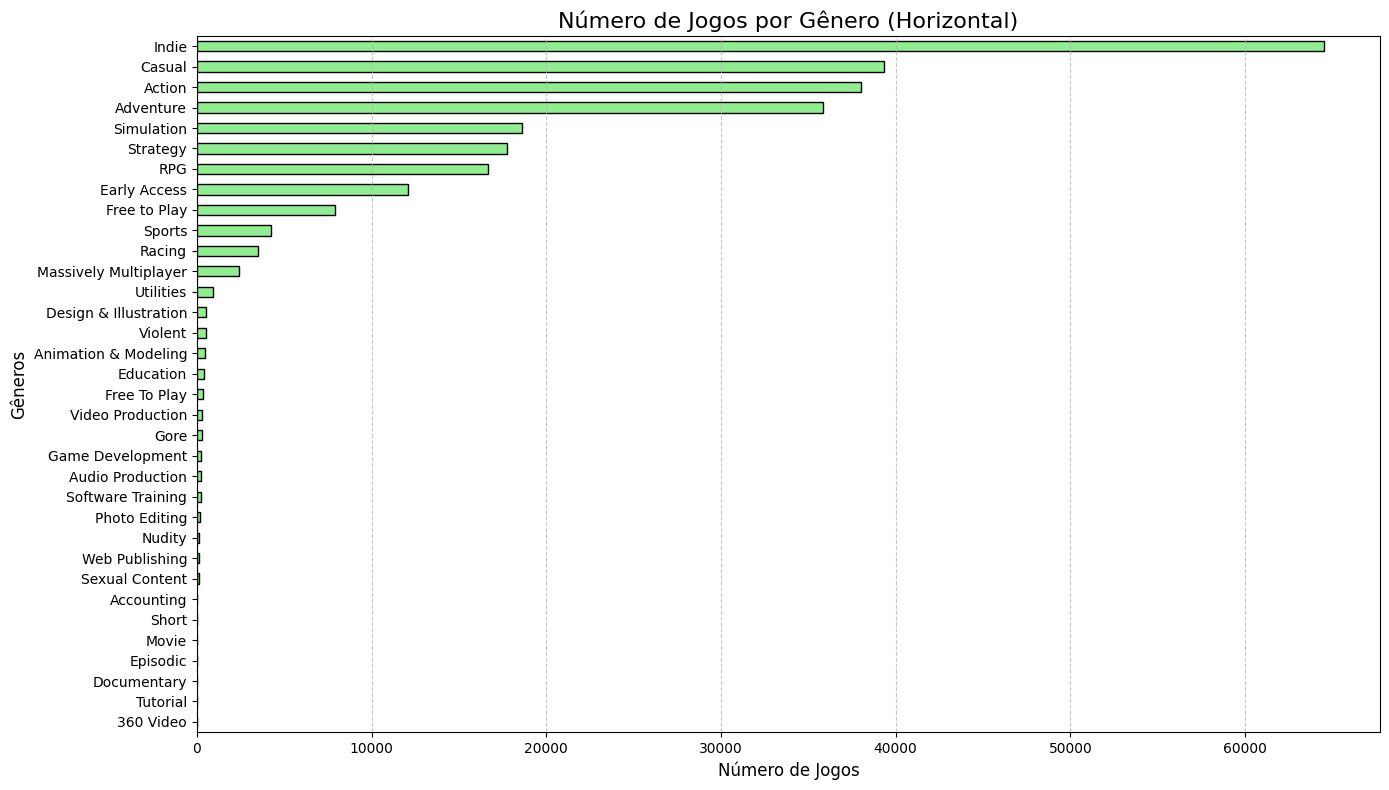

In [171]:
# Transformando cada gênero em uma linha separada
exploded_df = df_analise.explode('Genres')

# Contando o número de jogos por gênero
genre_counts = exploded_df['Genres'].value_counts()

# Plotando o gráfico de barras (horizontal) com a ordem invertida
plt.figure(figsize=(14, 8))
genre_counts[::-1].plot(kind='barh', color='lightgreen', edgecolor='black')
plt.title('Número de Jogos por Gênero (Horizontal)', fontsize=16)
plt.xlabel('Número de Jogos', fontsize=12)
plt.ylabel('Gêneros', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

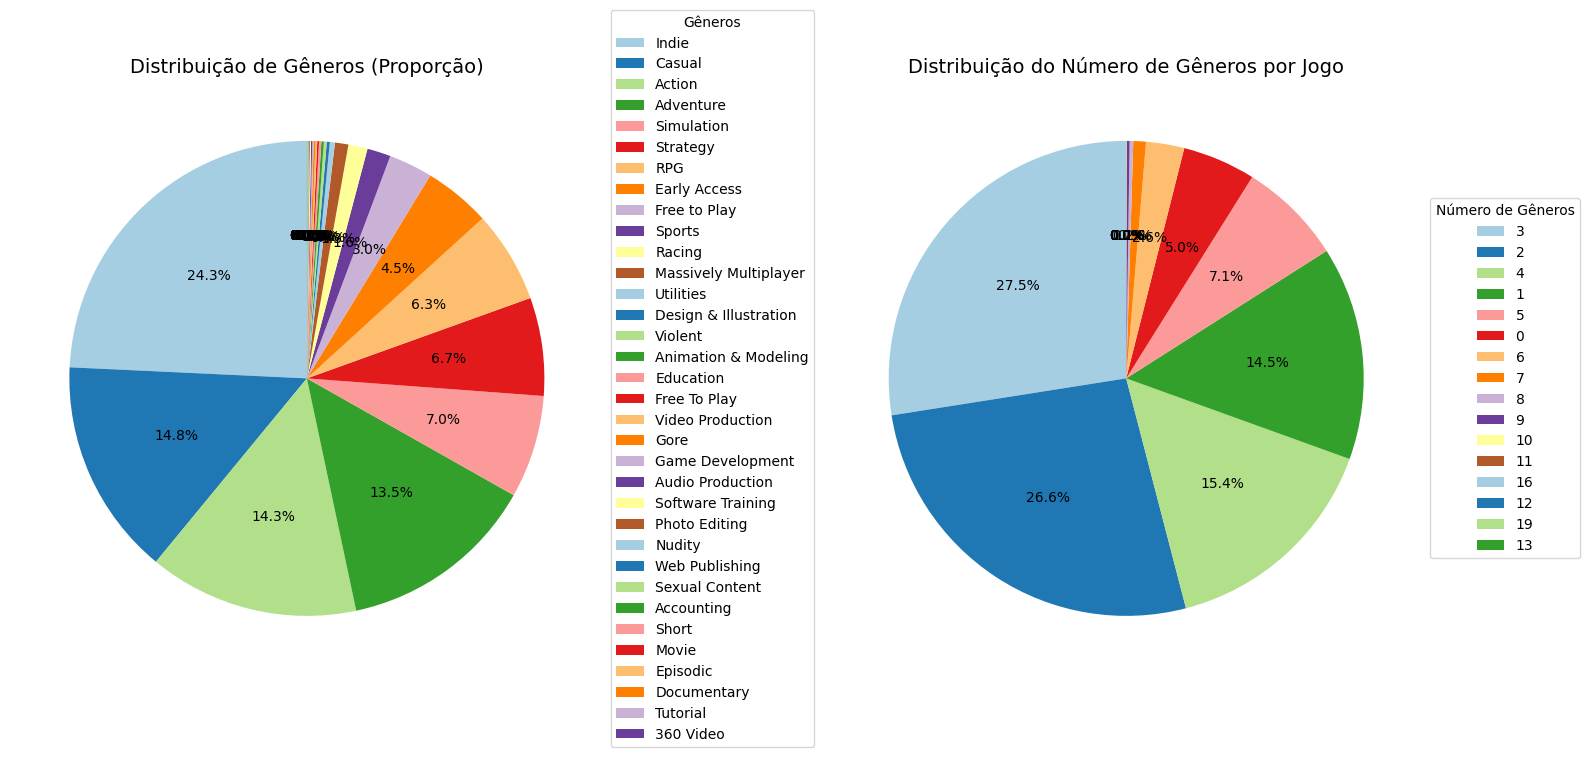

In [172]:
# Contando o número de gêneros por jogo
df_analise['Num_Genres'] = df_analise['Genres'].apply(len)

# Contando a distribuição do número de gêneros por jogo
num_genres_counts = df_analise['Num_Genres'].value_counts()

# Proporção de cada gênero
genre_proportion = genre_counts / genre_counts.sum()

# Criando os subgráficos
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Gráfico de pizza (Distribuição de Gêneros)
wedges1, texts1, autotexts1 = axes[0].pie(genre_proportion, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
axes[0].set_title('Distribuição de Gêneros (Proporção)', fontsize=14)
axes[0].set_ylabel('')  # Remover o rótulo do eixo y
axes[0].legend(wedges1, genre_proportion.index, title="Gêneros", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Gráfico de pizza (Distribuição do Número de Gêneros por Jogo)
wedges2, texts2, autotexts2 = axes[1].pie(num_genres_counts, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
axes[1].set_title('Distribuição do Número de Gêneros por Jogo', fontsize=14)
axes[1].set_ylabel('')  # Remover o rótulo do eixo y
axes[1].legend(wedges2, num_genres_counts.index.astype(str), title="Número de Gêneros", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.tight_layout()
plt.show()

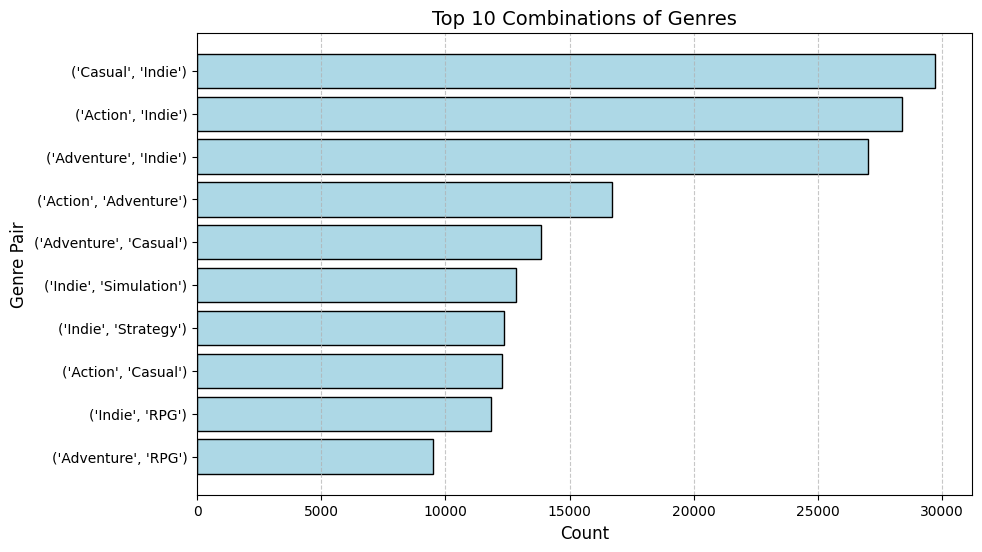

In [173]:
# Criando a lista de combinações de gêneros
genre_combinations = []
for genres in df_analise['Genres']:
    genre_combinations.extend(combinations(genres, 2))

# Contando a frequência das combinações
genre_pair_counts = Counter(genre_combinations)

# Convertendo para DataFrame e ordenando
genre_pairs_df = pd.DataFrame(genre_pair_counts.items(), columns=['Genre Pair', 'Count']).sort_values(by='Count', ascending=False)

# Selecionando as 10 combinações mais frequentes
top_combinations = genre_pairs_df.head(10)

# Criando o gráfico de barras horizontais
plt.figure(figsize=(10, 6))
plt.barh(top_combinations['Genre Pair'].astype(str), top_combinations['Count'], color='lightblue', edgecolor='black')
plt.title('Top 10 Combinations of Genres', fontsize=14)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Genre Pair', fontsize=12)
plt.gca().invert_yaxis()  # Inverter a ordem para exibir a combinação mais frequente no topo
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

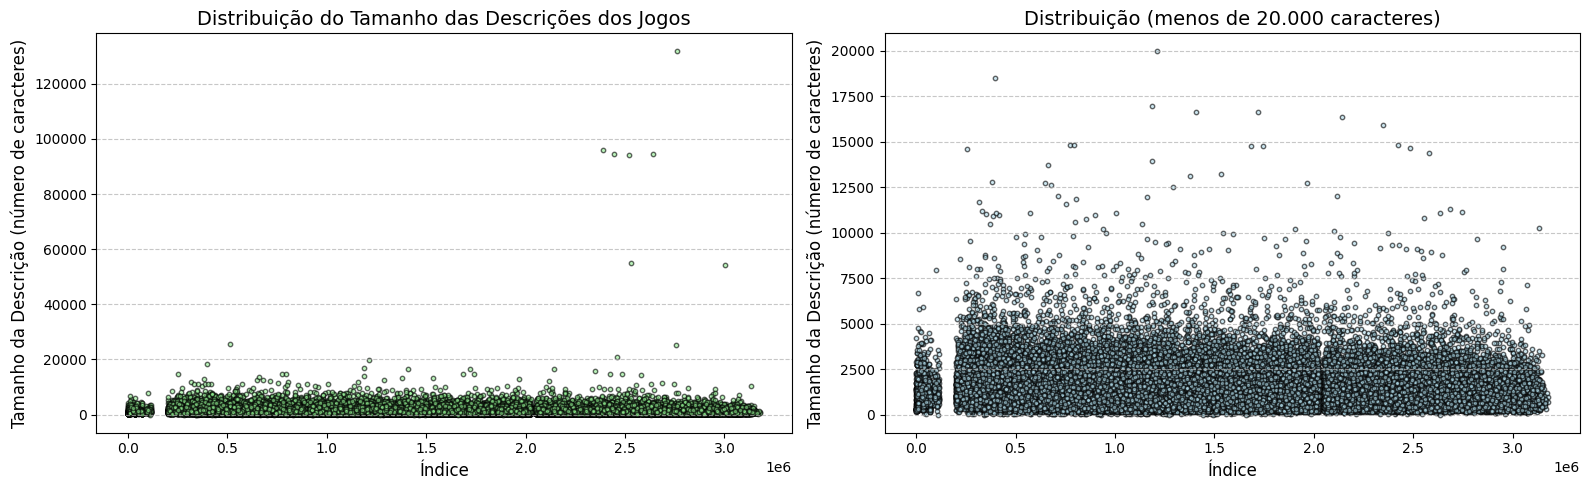

In [174]:
# Calculando o tamanho da descrição
df_analise['Description_Length'] = df_analise['About the game'].str.len()

# Criando os subgráficos
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Primeiro gráfico (todos os dados)
axes[0].scatter(df_analise.index, df_analise['Description_Length'], color='lightgreen', edgecolor='black', alpha=0.6, s=10)
axes[0].set_title('Distribuição do Tamanho das Descrições dos Jogos', fontsize=14)
axes[0].set_xlabel('Índice', fontsize=12)
axes[0].set_ylabel('Tamanho da Descrição (número de caracteres)', fontsize=12)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Segundo gráfico (apenas valores menores que 20.000 caracteres)
filtered_data = df_analise[df_analise['Description_Length'] < 20000]
axes[1].scatter(filtered_data.index, filtered_data['Description_Length'], color='lightblue', edgecolor='black', alpha=0.6, s=10)
axes[1].set_title('Distribuição (menos de 20.000 caracteres)', fontsize=14)
axes[1].set_xlabel('Índice', fontsize=12)
axes[1].set_ylabel('Tamanho da Descrição (número de caracteres)', fontsize=12)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [175]:
df_analise.head()

,Name,About the game,Genres,Num_Genres,Description_Length
20200,Galactic Bowling,Galactic Bowling is an exaggerated and stylize...,"[Casual, Indie, Sports]",3,1043.0
655370,Train Bandit,THE LAW!! Looks to be a showdown atop a train....,"[Action, Indie]",2,491.0
1732930,Jolt Project,Jolt Project: The army now has a new robotics ...,"[Action, Adventure, Indie, Strategy]",4,628.0
1355720,Henosis™,HENOSIS™ is a mysterious 2D Platform Puzzler w...,"[Adventure, Casual, Indie]",3,615.0
1139950,Two Weeks in Painland,ABOUT THE GAME Play as a hacker who has arrang...,"[Adventure, Indie]",2,672.0
